In [1]:
import pandas as pd
import numpy as np

# Understanding merge operations on DF

In [13]:
# Creating products and invoices dataframes
products=pd.DataFrame([{'Product ID':4109,'Price':5.0,'Product':'Sushi Roll'},
                      {'Product ID':1412,'Price':0.5,'Product':'Egg'},
                     {'Product ID':8931,'Price':1.5,'Product':'Bagel'}])
products=products.set_index('Product ID')
products.head()

,Price,Product
Product ID,,
4109,5.0,Sushi Roll
1412,0.5,Egg
8931,1.5,Bagel


In [14]:
invoices=pd.DataFrame([{'Customer':'Ali','Product ID':4109,'Quantity':1},
                      {'Customer':'Eric','Product ID':1412,'Quantity':12},
                      {'Customer':'Ande','Product ID':8931,'Quantity':6},
                      {'Customer':'Sam','Product ID':4109,'Quantity':2}])
invoices.head()

,Customer,Product ID,Quantity
0,Ali,4109,1
1,Eric,1412,12
2,Ande,8931,6
3,Sam,4109,2


In [17]:
# OUTER JOIN PERFORMS THE FULL JOIN AND SELECT ALL THE ENTRIES
result=pd.merge(products,invoices,how='outer',left_on=products.index,right_on='Product ID')
result.head()

,Price,Product,Customer,Product ID,Quantity
0,5.0,Sushi Roll,Ali,4109,1
1,5.0,Sushi Roll,Sam,4109,2
2,0.5,Egg,Eric,1412,12
3,1.5,Bagel,Ande,8931,6


In [18]:
# Creating a DF and understanding only those students who are also staff members, i.e. inner join
staff_df=pd.DataFrame([{'First Name':'Kelly','Last Name':'Desjardine','Role':'Director of HR'},
                      {'First Name':'Sally','Last Name':'Brooks','Role':'Course liaison'},
                      {'First Name':'James','Last Name':'Wilde','Role':'Grader'}])

student_df=pd.DataFrame([{'First Name':'James','Last Name':'Hammond','School':'Business'},
                        {'First Name':'Mike','Last Name':'Smith','School':'Law'},
                        {'First Name':'Sally','Last Name':'Brooks','School':'Engineering'}])
print(staff_df)
print(student_df)

  First Name   Last Name            Role
0      Kelly  Desjardine  Director of HR
1      Sally      Brooks  Course liaison
2      James       Wilde          Grader
  First Name Last Name       School
0      James   Hammond     Business
1       Mike     Smith          Law
2      Sally    Brooks  Engineering


In [19]:
# Selecting the students who are also staff members
result=pd.merge(student_df,staff_df,how='inner',on=['First Name','Last Name'])
result

,First Name,Last Name,School,Role
0,Sally,Brooks,Engineering,Course liaison


# Idiomatic Pandas : Making Code Pandorable

In [32]:
# There are more than on ways to solve a particular problem in Python,
# Idiomatic Python solutions are those that has both high performance and high readability.
census=pd.read_csv('../dataset/census.csv')
census.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [33]:
# Consider the following operations
census=census[census['SUMLEV']==50]
census.set_index(['STNAME','CTYNAME'],inplace=True)
census.rename(columns={'ESTIMATESBASE2010':'Estimate Base 2010'},inplace=True)
census.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  Estimate Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                              
Alabama Autauga County          54571               54571            54660   
        Baldwin County         182265              182265           183193   
        Barbour County          27457               27457            27341   
        Bibb County             22915               22919            22861   
        Blount County           57322               57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                           ...   
Alabama Autauga County            55253            55175  ...   
        Baldwin County           186659           190396  ...   
        Barbour County            27226            27159  ...   
        Bibb County               22733            22642  ...   
        Blount County             57711            57776  ...   

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [42]:
# The above operations can also be performed in one line,
# and hence makes the code more readable
census=pd.read_csv('../dataset/census.csv')
census=(census.where(census['SUMLEV']==50)
                .dropna()
                .set_index(['STNAME','CTYNAME'])
                .rename(columns={'ESTIMATESBASE2010':'Estimate Base 2010'}))
census.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  Estimate Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                              
Alabama Autauga County        54571.0             54571.0          54660.0   
        Baldwin County       182265.0            182265.0         183193.0   
        Barbour County        27457.0             27457.0          27341.0   
        Bibb County           22915.0             22919.0          22861.0   
        Blount County         57322.0             57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                           ...   
Alabama Autauga County          55253.0          55175.0  ...   
        Baldwin County         186659.0         190396.0  ...   
        Barbour County          27226.0          27159.0  ...   
        Bibb County             22733.0          22642.0  ...   
        Blount County           57711.0          57776.0  ...   

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

# Group by 

In [3]:
df=pd.read_csv('../dataset/census.csv')
df=df[df['SUMLEV']==50]

In [6]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg=np.average(df[df['STNAME']==state].dropna()['CENSUS2010POP'])

133 ms ± 9.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%%timeit
for group,frame in df.groupby('STNAME'):
    avg=np.average(frame['CENSUS2010POP'])

17.9 ms ± 721 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Hence, we can see that the later part performs better and faster and produces the same result more
effectively. Also the groupby() returns a groupby object that has different columns present that can be used
for different transformation.

In [15]:
%%timeit
# Another way to perform the same task is by using agg() along with groupby()
df.groupby('STNAME').agg({'CENSUS2010POP':np.average})

5.03 ms ± 400 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Note : <br>
The agg() changes the value of the data and keeps the column name same, without changing the column name itself.<br>
So be aware while performing these tasks.

In [18]:
# Way to calculate the sum of the column
(df.set_index('STNAME')
   .groupby(level=0)
   .agg({'CENSUS2010POP':np.sum,'POPESTIMATE2010':np.average}))

,CENSUS2010POP,POPESTIMATE2010
STNAME,,
Alabama,4779736,71420.313433
Alaska,710231,24621.413793
Arizona,6392017,427213.866667
Arkansas,2915918,38965.253333
California,37253956,643691.017241
Colorado,5029196,78878.968750
Connecticut,3574097,447464.625000
Delaware,897934,299930.333333
District of Columbia,601723,605126.000000


In [29]:
# Alternative approach
df.groupby('STNAME')[['CENSUS2010POP','POPESTIMATE2010']].agg(['mean','sum'])

CENSUS2010POP           POPESTIMATE2010          
                               mean       sum            mean       sum
STNAME                                                                 
Alabama                71339.343284   4779736    71420.313433   4785161
Alaska                 24490.724138    710231    24621.413793    714021
Arizona               426134.466667   6392017   427213.866667   6408208
Arkansas               38878.906667   2915918    38965.253333   2922394
California            642309.586207  37253956   643691.017241  37334079
Colorado               78581.187500   5029196    78878.968750   5048254
Connecticut           446762.125000   3574097   447464.625000   3579717
Delaware              299311.333333    897934   299930.333333    899791
District of Columbia  601723.000000    601723   605126.000000    605126
Florida               280616.567164  18801310   281341.641791  18849890
Georgia                60928.635220   9687653    61090.905660   9713454
Hawaii                272060.200000   1360301   272796.000000   1363980
Idaho                  35626.863636   1567582    35704.227273   1570986
Illinois              125790.509804  12830632   125894.598039  12841249
Indiana                70476.108696   6483802    70549.891304   6490590
Iowa                   30771.262626   3046355    30815.090909   3050694
Kansas                 27172.552381   2853118    27226.895238   2858824
Kentucky               36161.391667   4339367    36232.808333   4347937
Louisiana              70833.937500   4533372    71014.859375   4544951
Maine                  83022.562500   1328361    82980.937500   1327695
Maryland              240564.666667   5773552   241183.708333   5788409
Massachusetts         467687.785714   6547629   468931.142857   6565036
Michigan              119080.000000   9883640   119004.445783   9877369
Minnesota              60964.655172   5303925    61044.862069   5310903
Mississippi            36186.548780   2967297    36223.365854   2970316
Missouri               52077.626087   5988927    52139.582609   5996052
Montana                17668.125000    989415    17690.053571    990643
Nebraska               19638.075269   1826341    19677.688172   1830025
Nevada                158855.941176   2700551   159025.882353   2703440
New Hampshire         131647.000000   1316470   131670.800000   1316708
New Jersey            418661.619048   8791894   419232.428571   8803881
New Mexico             62399.363636   2059179    62567.909091   2064741
New York              312550.032258  19378102   312950.322581  19402920
North Carolina         95354.830000   9535483    95589.790000   9558979
North Dakota           12690.396226    672591    12726.981132    674530
Ohio                  131096.636364  11536504   131145.068182  11540766
Oklahoma               48718.844156   3751351    48825.922078   3759596
Oregon                106418.722222   3831074   106610.333333   3837972
Pennsylvania          189587.746269  12702379   189731.552239  12712014
Rhode Island          210513.400000   1052567   210643.800000   1053219
South Carolina        100551.391304   4625364   100780.304348   4635894
South Dakota           12336.060606    814180    12368.166667    816299
Tennessee              66801.105263   6346105    66911.421053   6356585
Texas                  98998.271654  25145561    99387.255906  25244363
Utah                   95306.379310   2763885    95704.344828   2775426
Vermont                44695.785714    625741    44713.142857    625984
Virginia               60111.293233   7994802    60344.263158   8025787
Washington            172424.102564   6724540   172898.974359   6743060
West Virginia          33690.800000   1852994    33713.181818   1854225
Wisconsin              78985.916667   5686986    79030.611111   5690204
Wyoming                24505.478261    563626    24544.173913    564516

In [30]:
s = pd.Series(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'])

In [40]:
cat_dt=pd.CategoricalDtype(categories=['Low','Medium','High'],ordered=True)
s=s.astype(cat_dt)

# Pivot tables

 1. A pivot table is a dataframe itself, where the rows represent one variable that you're interested in, the columns another, and the cells's some aggregate values.
 2. This allows us to see the relationship between the 2 variables at just a glance

In [3]:
cars=pd.read_csv('../dataset/cars.csv')
cars.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [4]:
# Creating a pivot table with rows as year and column as column and checking against the kw values.
cars.pivot_table(values='(kW)',index='YEAR',columns='Make',aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


# Date Functionality 

Pandas has 4 main time related classes :-
1. Timestamp
2. Period
3. datetimeindex
4. Periodindex

### Timestamp

In [5]:
# These are usually interchangeable with Python datetime
pd.Timestamp('9/1/2016 10:30am')

Timestamp('2016-09-01 10:30:00')

### Period

In [8]:
# to have a span of time evaluations
pd.Period('5/2016')

Period('2016-05', 'M')

In [10]:
# 1st March 2016 and is a Day period
pd.Period('1/5/2016')

Period('2016-01-05', 'D')

### DatetimeIndex

In [12]:
# typically and index of Timestamp is datetimeindex
t1=pd.Series(list('abc'),index=[pd.Timestamp('2016-09-01'),pd.Timestamp('2016-09-02'),pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [13]:
type(t1.index)
# Similarly for period the index type is PeriodIndex

pandas.core.indexes.datetimes.DatetimeIndex

### Converting to Datetime

In [16]:
d1=['2 June 2013','Aug 29 2014','2015-06-26','7/12/16']
t2=pd.DataFrame(np.random.randint(10,100,(4,2)),columns=list('ab'),index=d1)
t2

,a,b
2 June 2013,59,17
Aug 29 2014,95,59
2015-06-26,28,41
7/12/16,79,19


In [21]:
t2.index=pd.to_datetime(t2.index)
t2

,a,b
2013-06-02,59,17
2014-08-29,95,59
2015-06-26,28,41
2016-07-12,79,19


### Timedeltas

In [26]:
pd.Timestamp('9/3/2019') - pd.Timestamp('9/1/2019')

Timedelta('2 days 00:00:00')

In [28]:
pd.Timestamp('9/3/2019 10:15am') + pd.Timedelta('12D 3H')

Timestamp('2019-09-15 13:15:00')

### Generate data by weekly every Sunday

In [35]:
dates=pd.date_range('2016/10/1',freq='2W-SUN',periods=9)
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [36]:
df=pd.DataFrame({'Count1':100+np.random.randint(-5,10,9),
                'Count2':120+np.random.randint(-5,10,9)},index=dates)
df

,Count1,Count2
2016-10-02,99,128
2016-10-16,103,126
2016-10-30,101,125
2016-11-13,107,116
2016-11-27,95,125
2016-12-11,95,115
2016-12-25,106,126
2017-01-08,98,123
2017-01-22,106,124


In [40]:
# to calculate the mean of the value each month
df.resample('M').mean()

,Count1,Count2
2016-10-31,101.0,126.333333
2016-11-30,101.0,120.500000
2016-12-31,100.5,120.500000
2017-01-31,102.0,123.500000


In [41]:
# to seach for day in 2017
df['2017']

,Count1,Count2
2017-01-08,98,123
2017-01-22,106,124


In [42]:
# To search for monthly data for 2017
df['2017-01']

,Count1,Count2
2017-01-08,98,123
2017-01-22,106,124


In [43]:
# To search for data above Dec 2016
df['2016-12':]

,Count1,Count2
2016-12-11,95,115
2016-12-25,106,126
2017-01-08,98,123
2017-01-22,106,124


### Ploting timeseries

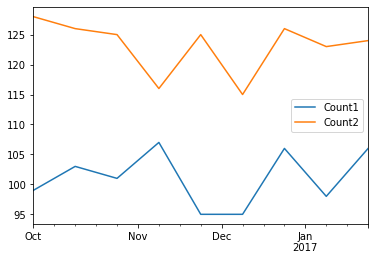

In [44]:
df.plot()